In [20]:
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np
import matplotlib.pyplot as plt


def draw_landmarks_on_image(rgb_image, detection_result):
  face_landmarks_list = detection_result.face_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected faces to visualize.
  for idx in range(len(face_landmarks_list)):
    face_landmarks = face_landmarks_list[idx]

    # Draw the face landmarks.
    face_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    face_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in face_landmarks
    ])

    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_TESSELATION,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp.solutions.drawing_styles
        .get_default_face_mesh_tesselation_style())
    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_CONTOURS,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp.solutions.drawing_styles
        .get_default_face_mesh_contours_style())
    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_IRISES,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp.solutions.drawing_styles
          .get_default_face_mesh_iris_connections_style())

  return annotated_image

def plot_face_blendshapes_bar_graph(face_blendshapes):
  # Extract the face blendshapes category names and scores.
  face_blendshapes_names = [face_blendshapes_category.category_name for face_blendshapes_category in face_blendshapes]
  face_blendshapes_scores = [face_blendshapes_category.score for face_blendshapes_category in face_blendshapes]
  # The blendshapes are ordered in decreasing score value.
  face_blendshapes_ranks = range(len(face_blendshapes_names))

  fig, ax = plt.subplots(figsize=(12, 12))
  bar = ax.barh(face_blendshapes_ranks, face_blendshapes_scores, label=[str(x) for x in face_blendshapes_ranks])
  ax.set_yticks(face_blendshapes_ranks, face_blendshapes_names)
  ax.invert_yaxis()

  # Label each bar with values
  for score, patch in zip(face_blendshapes_scores, bar.patches):
    plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{score:.4f}", va="top")

  ax.set_xlabel('Score')
  ax.set_title("Face Blendshapes")
  plt.tight_layout()
  plt.show()

In [24]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 2: Create an FaceLandmarker object.
base_options = python.BaseOptions(model_asset_path=r'C:\D\Amitt\projects\Images_ml_project\face_landmarker.task')
options = vision.FaceLandmarkerOptions(base_options=base_options,
                                       output_face_blendshapes=True,
                                       output_facial_transformation_matrixes=True,
                                       num_faces=1)
detector = vision.FaceLandmarker.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file(r"C:\D\Amitt\projects\Images_ml_project\13.jpg")

# STEP 4: Detect face landmarks from the input image.
detection_result = detector.detect(image)

# STEP 5: Process the detection result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)


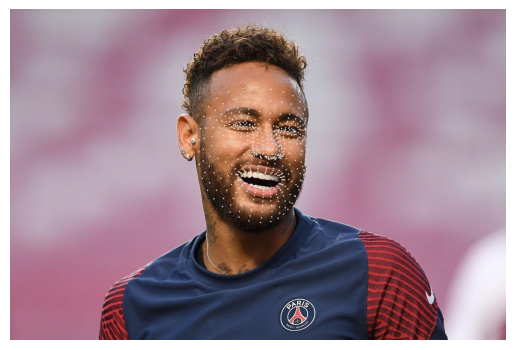

In [36]:
import cv2

def draw_points_on_image(rgb_image, detection_result):
    annotated_image = np.copy(rgb_image)
    h, w, _ = annotated_image.shape

    # Use the default drawing spec from MediaPipe.
    drawing_spec = mp.solutions.drawing_utils.DrawingSpec()

    # Loop through each detected face.
    for face_landmarks in detection_result.face_landmarks:
        for landmark in face_landmarks:
            # Convert normalized coordinates to pixel coordinates.
            x = int(landmark.x * w)
            y = int(landmark.y * h)
            # Draw a circle using the default drawing spec.
            cv2.circle(annotated_image, (x, y), 
                       drawing_spec.circle_radius if drawing_spec.circle_radius is not None else 2,
                       drawing_spec.color if drawing_spec.color is not None else (0, 255, 0), 
                       drawing_spec.thickness if drawing_spec.thickness is not None else -1)
    return annotated_image

# Use the function and preview the image.
annotated_image = draw_points_on_image(image.numpy_view(), detection_result)
plt.imshow(annotated_image)
plt.axis("off")
plt.show()


In [26]:
print(detection_result.facial_transformation_matrixes)

[array([[  0.96828812,   0.07253693,   0.23907509,  -0.05815339],
       [ -0.08777798,   0.99469078,   0.05371751,   3.29822755],
       [ -0.23390929,  -0.07299958,   0.96951431, -38.20593643],
       [  0.        ,   0.        ,   0.        ,   1.        ]])]
